In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#форматирование данных
mau_region = pd.read_excel('hw_lesson03_mau_region.xlsx')
mau_region = mau_region.set_index('month')
mau_region

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
month,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241
5,3190,1937,5432,6884,4872,5930,2587,4119
6,2805,1846,4941,6225,4387,5383,2361,3805


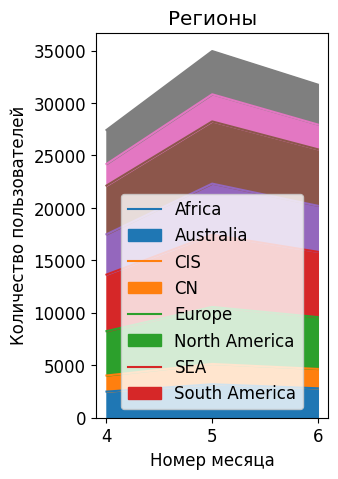

In [4]:
#вывод данных на графике
plt.rcParams.update({'font.size': 12})
mau_region[[j for j in mau_region.columns.tolist()]].plot.area(figsize=(3, 5))
plt.legend(mau_region.columns.tolist())
plt.xlabel('Номер месяца')
plt.ylabel('Количество пользователей')
plt.title('Регионы')
plt.show()

In [5]:
mau_region.loc[5, 'Africa'] = 5000
mau_region

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
month,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241
5,5000,1937,5432,6884,4872,5930,2587,4119
6,2805,1846,4941,6225,4387,5383,2361,3805


In [7]:
# функция с apply
def mau(df):
    if (df['Australia'] + df['Africa']) > df['CIS']:
        return df['Australia'] + df['Africa']
    else:
        return 0

mau_region.apply(mau, axis=1)

month
4       0
5    6937
6       0
dtype: int64

In [ ]:
# создание нового столбца без apply
new_column = []
for ind in mau_region.index:
    new_column.append(mau_region['Europe'][ind] >= 4000)
mau_region['EU превышает порог'] = new_column
mau_region = mau_region.rename(columns={'Europe': 'EU'})
mau_region

,Africa,Australia,CIS,CN,EU,North America,SEA,South America,EU превышает порог
month,,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241,False
5,5000,1937,5432,6884,4872,5930,2587,4119,True
6,2805,1846,4941,6225,4387,5383,2361,3805,True
